In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

**(a)**

In [ ]:
data = pd.read_csv(r"/content/adult.data", header=None, names=['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income'])

**(b)**

In [ ]:
print(data.shape)

data.head()

(32561, 15)


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


**(c)**

In [ ]:
for i in list(data.columns):
  temp = list(data[i])

  print(i +" " + str(temp.count(" ?")))

age 0
workclass 1836
fnlwgt 0
education 0
education_num 0
marital_status 0
occupation 1843
relationship 0
race 0
sex 0
capital_gain 0
capital_loss 0
hours_per_week 0
native_country 583
income 0


**(d)**

In [ ]:
data = data.replace(' ?', pd.NA)
data.isna().sum()
data = data.dropna()
data.shape

(30162, 15)

In [ ]:
data.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

**(e)**

<Axes: >

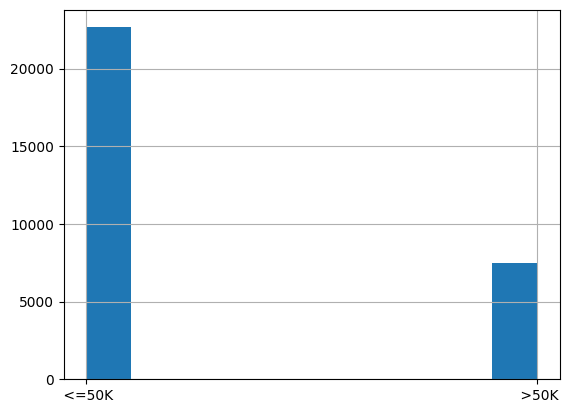

In [ ]:
data.income.hist()

**(f)**

In [ ]:
#print(data.income.iloc[10])
#print(data.income.iloc[27])

data.income = data.income.replace(' >50K',1)
data.income = data.income.replace(' <=50K',0)

data.income

0        0
1        0
2        0
3        0
4        0
        ..
32556    0
32557    1
32558    0
32559    0
32560    1
Name: income, Length: 30162, dtype: int64

**(g)**

In [ ]:
data.columns

target_columns = data.select_dtypes(include=['object']).columns

target_columns

dummies = pd.get_dummies(data, columns=target_columns)
dummies.head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,income,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,...,native_country_ Portugal,native_country_ Puerto-Rico,native_country_ Scotland,native_country_ South,native_country_ Taiwan,native_country_ Thailand,native_country_ Trinadad&Tobago,native_country_ United-States,native_country_ Vietnam,native_country_ Yugoslavia
0,39,77516,13,2174,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,215646,9,0,0,40,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,53,234721,7,0,0,40,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,28,338409,13,0,0,40,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


**(h) 105**

In [ ]:
num_features = dummies.shape[1]
num_features

105

**(i)**

In [ ]:
from sklearn.model_selection import train_test_split

dummies.columns

rest_data = dummies.drop(columns=['income'])
target = data['income']


X_train, X_test, Y_train, Y_test = train_test_split(rest_data, target, test_size=0.3,train_size=0.7, random_state=42, stratify=target)

**(j) and (k)**

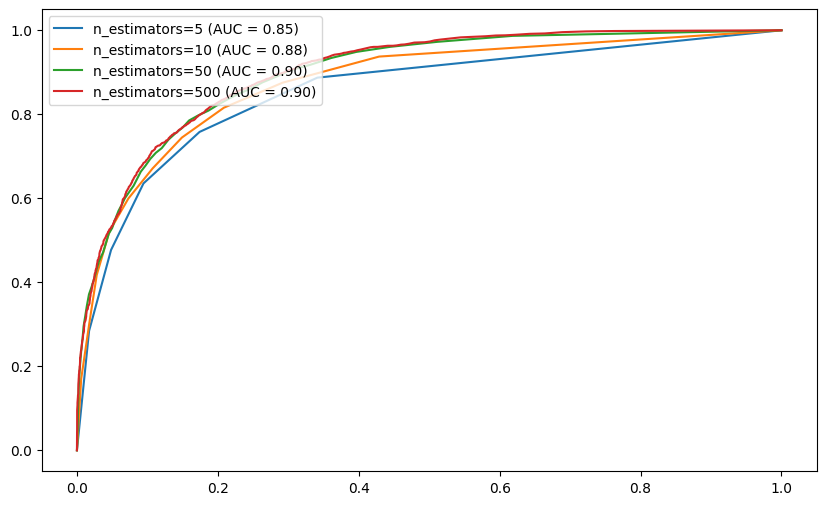

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, roc_auc_score

m = [5, 10, 50, 500]
res = []

for i in m:
  rf = RandomForestClassifier(n_estimators=i)
  rf.fit(X_train, Y_train)
  res.append(rf)

plt.figure(figsize=(10, 6))
for i, model in enumerate(res):
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(Y_test, y_pred_proba)
    auc = roc_auc_score(Y_test, y_pred_proba)
    plt.plot(fpr, tpr,label=f'n_estimators={m[i]} (AUC = {auc:.2f})')
    plt.legend(loc='upper left')



**(h)** The Models with tress = 500 and 50 provided the best results in terms of AUC with 0.90 score and its towards the left most part of the graph too.